In [1]:
#Import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Will create a data having some multicollinearity
x=np.random.normal(200,10,500)  # mean =200, std=10, no of observations=500
x.mean()

199.8413904693881

In [3]:
x.std()

9.785905338243317

In [4]:
len(x)

500

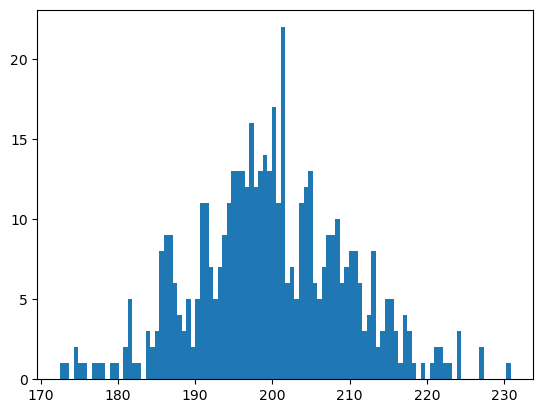

In [5]:
# we created a data having mean=200, std=10 no.of samples are 50
plt.hist(x,bins=100)
plt.show()

In [6]:
# Create a data y , should be correlate to X
y=0.5*x + np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print("mean:",y.mean())
print("std:",y.std())

mean: 110.00121723766732
std: 7.181848232372699


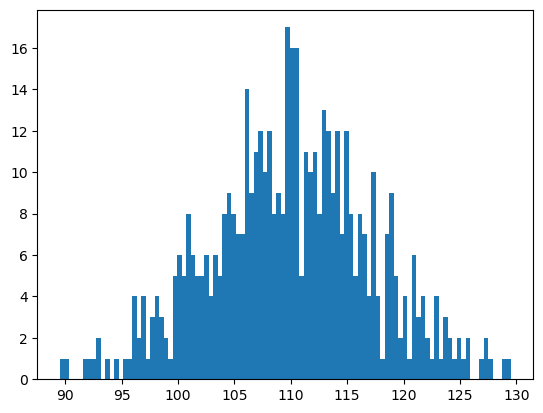

In [7]:
plt.hist(y,bins=100)
plt.show()

In [9]:
x[:10]

array([200.52696325, 195.6388117 , 201.18386827, 211.73518517,
       187.45258677, 194.37308478, 201.88744074, 190.69479953,
       194.43110071, 176.74236107])

In [10]:
y[:10]

array([103.33294895, 103.64762952, 107.13331989, 125.55732069,
       113.72793651, 108.01888815, 114.68438874, 106.01654748,
       100.17975115, 103.2522037 ])

In [8]:
data=pd.DataFrame()
data['x']=x
data['y']=y

In [9]:
data

,x,y
0,200.064492,115.844378
1,201.258907,104.863471
2,197.529456,108.388659
3,193.760248,110.445957
4,190.115502,103.046812
...,...,...
495,199.549021,113.918792
496,198.316648,108.783196
497,209.543769,124.530504
498,215.866456,117.345660


In [10]:
z=np.vstack([x,y]).T
z

array([[200.06449206, 115.84437759],
       [201.2589068 , 104.86347112],
       [197.5294557 , 108.38865873],
       [193.76024803, 110.44595703],
       [190.11550175, 103.04681249],
       [200.92704688, 118.86852547],
       [199.87033408, 113.62477964],
       [198.88667318, 109.76213633],
       [203.59643178, 113.46330321],
       [201.18617178, 109.5337716 ],
       [187.14075605, 106.78297609],
       [219.70269616, 120.23269543],
       [208.16175038, 123.76724147],
       [191.29621957, 108.04279116],
       [186.3423945 , 100.51648072],
       [189.22894001, 107.47123678],
       [199.55301171, 108.67112575],
       [193.67010117, 110.83885414],
       [204.23189085, 111.72552023],
       [211.69669396, 106.93869855],
       [200.50366682, 109.96977942],
       [191.42035138, 104.10449892],
       [186.4048684 , 108.7004143 ],
       [201.54381514, 112.63763085],
       [214.43557523, 118.39891694],
       [209.63314057, 116.33833221],
       [204.62272181, 116.1423934 ],
 

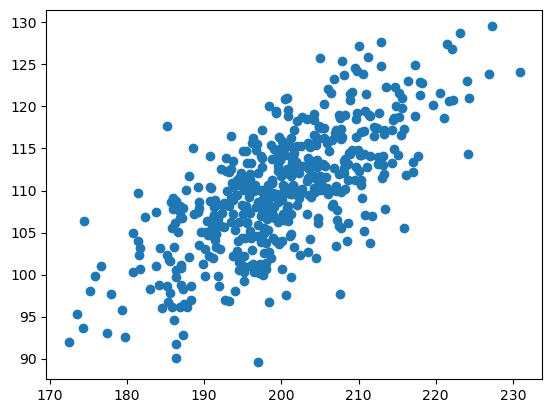

In [11]:
plt.scatter(z[:,0],z[:,1])
plt.show()

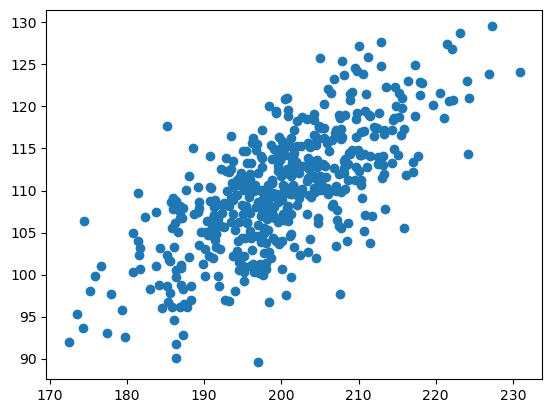

In [12]:
plt.scatter(data['x'],data['y'])
plt.show()

**Observations**
- Both points are correalted each other
- Both points are not orthogonal to each other
- Perform covariance matrix for better idea

In [13]:
cov_mat=np.cov(z,rowvar=False)
cov_mat

# cov(x,y)=cov(y,x)

array([[95.955855  , 49.62877528],
       [49.62877528, 51.68230865]])

**PCA**

- to reduce the dimensions

- to avoid multi collinearity

- to make data has orthogonal

- Need to find eigen values and eigen vectors
- Eigen values will decide how many Pc's we need to consider
- Eigen vector will generate new data

|cov_mat - lambda*I|=0

In [14]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [15]:
eig_values  # two lambda values

# 120/140= 86% of data varies one side
# 19/140= 14% of data varies another side

array([128.16107353,  19.47709012])

In [16]:
eig_vectors

array([[ 0.83885647, -0.54435266],
       [ 0.54435266,  0.83885647]])

**Quick checks**

- cov_mat * eig_vector = eig_value * eig_vector

-  A      *    x        =  lambda *  x

- (eig_vector.T)*eigen_vector=1

- A.T*A=1

In [17]:
cov_mat*eig_vectors[0]

array([[ 80.49318989, -27.01555596],
       [ 41.63141929, -28.13340232]])

In [18]:
eig_values[0]*eig_vectors[0]

array([107.50874585, -69.76482161])

In [19]:
eig_values/sum(eig_values)

array([0.86807551, 0.13192449])

In [ ]:
#PC1 = 0.868
#PC2=  0.13
# SO WE CAN GO FOR PC1

In [20]:
new_data=np.dot(z,eig_vectors)
# New pc= Original data * eigen vectors
new_data=pd.DataFrame(new_data,columns=['pc1','pc2'])
new_data.head()

,pc1,pc2
0,230.885589,-11.728833
1,225.910046,-21.590420
2,224.700517,-16.603157
3,222.658589,-12.825601
4,215.573426,-17.048394


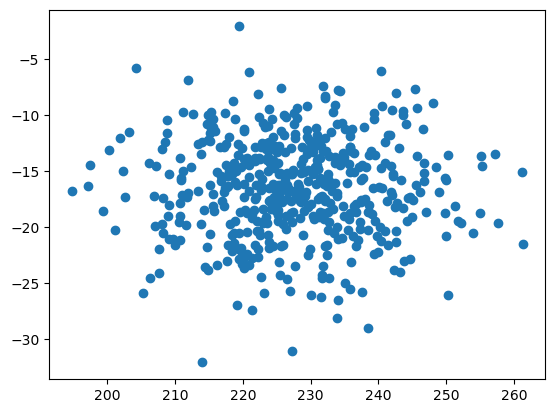

In [25]:
plt.scatter(new_data['pc1'],new_data['pc2'])

In [26]:
cov_mat=np.cov(new_data,rowvar=False)
cov_mat

# 0.000000000000008

array([[ 1.28161074e+02, -1.99350667e-14],
       [-1.99350667e-14,  1.94770901e+01]])

In [23]:
old_data=pd.DataFrame(z,columns=['X','Y'])

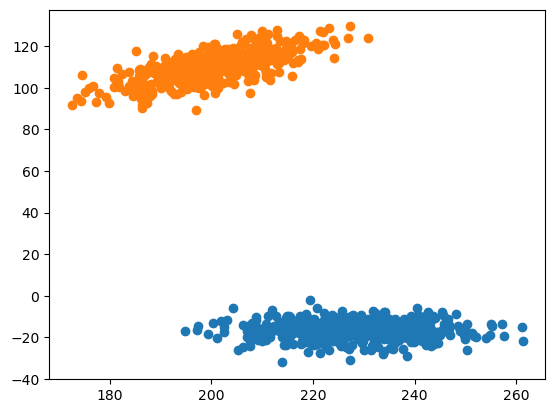

In [24]:
plt.scatter(new_data['pc1'],new_data['pc2']) # Blue no correlation
plt.scatter(old_data['X'],old_data['Y']) # Orange # Correlation

**using PCA Package**

In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [28]:
pca.transform(z)

array([[ 3.36789011e+00, -4.78012693e+00],
       [-1.60765303e+00,  5.08146036e+00],
       [-2.81718196e+00,  9.41972934e-02],
       [-4.85911039e+00, -3.68335893e+00],
       [-1.19442734e+01,  5.39433999e-01],
       [ 5.73765275e+00, -6.84741893e+00],
       [ 1.99677538e+00, -3.02389323e+00],
       [-9.31015102e-01, -3.19148334e-01],
       [ 5.03453642e+00, -8.60126484e-01],
       [ 8.73623226e-01,  1.12415508e+00],
       [-1.24058675e+01, -4.21398174e+00],
       [ 2.22303172e+01,  2.22881295e+00],
       [ 1.44731597e+01, -7.01850843e+00],
       [-8.23424635e+00, -3.00874814e+00],
       [-1.64867617e+01,  6.08118203e-01],
       [-1.02795243e+01, -3.65462518e+00],
       [-9.65947227e-01,  9.58776103e-01],
       [-4.72085609e+00, -4.06201490e+00],
       [ 4.62162858e+00,  9.43537842e-01],
       [ 8.27780784e+00,  9.02247963e+00],
       [ 5.38441541e-01,  3.86883710e-01],
       [-1.02739374e+01,  3.62485274e-01],
       [-1.19794090e+01, -6.22301960e+00],
       [ 2.

In [29]:
pca.explained_variance_ratio_

array([0.86807551, 0.13192449])

In [30]:
pca.explained_variance_ # Byusing package

array([128.16107353,  19.47709012])

In [31]:
eig_values # Maths by scratch

array([128.16107353,  19.47709012])

In [29]:
133/152

0.875

In [32]:
# Read the data
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")

In [33]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
X=data.drop('quality',axis=1)

In [35]:
len(X.columns)

11

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [37]:
pca_data=pca.transform(X)  # Input data

In [38]:
# 6 columns

new_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [39]:
new_data['quality']=data['quality']

In [40]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,5
...,...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,-0.058238,5
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,0.040335,6
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,0.089513,6
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,0.015548,5


In [41]:
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [ ]:
PC1= 